<a href="https://colab.research.google.com/github/FanyuyCliford/cs8630-A/blob/main/Healthcare_Insurance_Analysis_Notebook_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Insurance Analysis

This notebook contains analysis and visualizations of a healthcare dataset, including hospitalization details and medical examination records.

## Importing Required Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Dataset

In [10]:

# Load the 'Hospitalisation details.csv' and 'Medical Examinations.csv' files
hospitalization_data_path = '/content/Hospitalisation details.csv'
medical_examinations_data_path = '/content/Medical Examinations.csv'
merged_data_with_names = '/content/Merged_Healthcare_Insurance_Data_with_Names.csv'
merged_data_with_names = pd.read_csv(merged_data_with_names)

hospitalization_data = pd.read_csv(hospitalization_data_path)
medical_examinations_data = pd.read_csv(medical_examinations_data_path)

# Merging the two datasets on 'Customer ID'
merged_data = pd.merge(hospitalization_data, medical_examinations_data, on="Customer ID")

# Display the first few rows of the merged dataset
merged_data.head()


,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No


## Visualizations

### Scatter Plot Matrix

<Figure size 1000x1000 with 0 Axes>

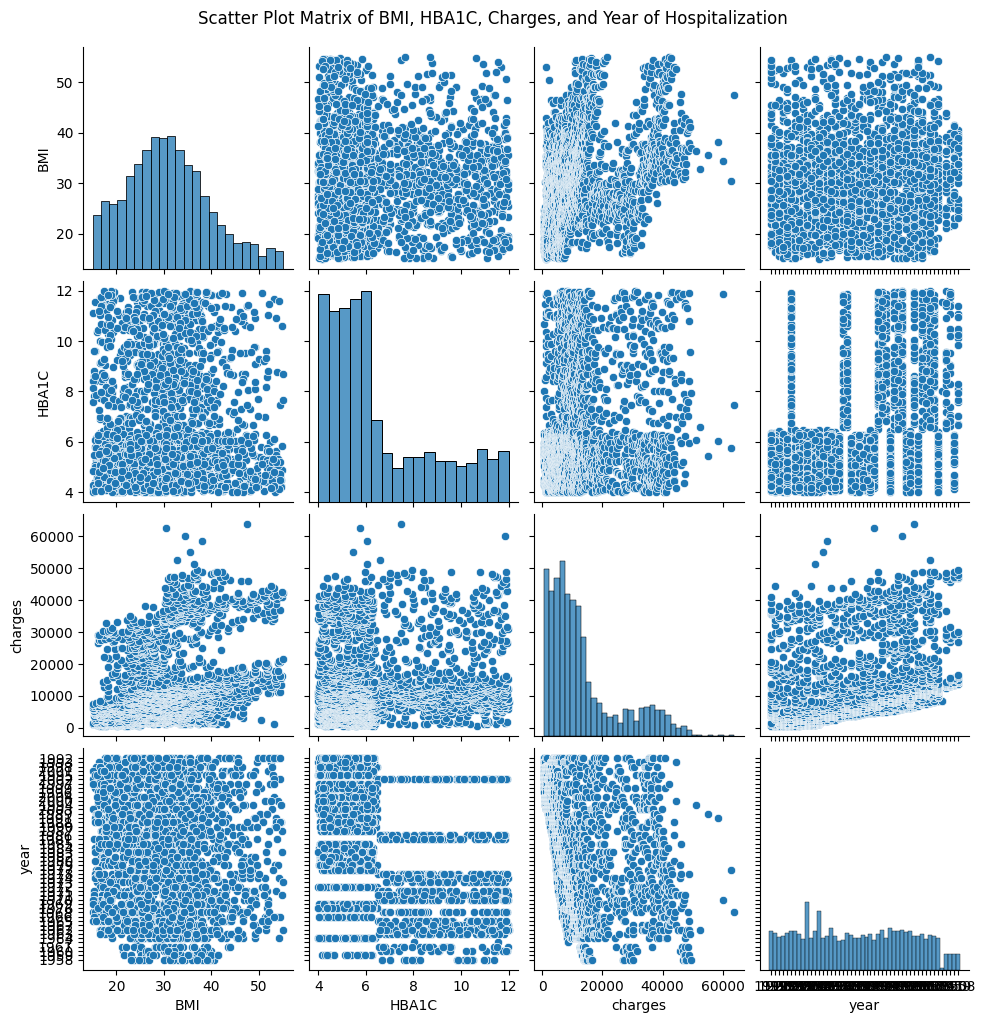

In [3]:

# Scatter plot matrix (pairplot) to show relationships between numerical variables
plt.figure(figsize=(10, 10))
sns.pairplot(merged_data, vars=['BMI', 'HBA1C', 'charges', 'year'])
plt.suptitle('Scatter Plot Matrix of BMI, HBA1C, Charges, and Year of Hospitalization', y=1.02)
plt.show()


### Bar Plot (Hospitalization Charges by Hospital and City Tier)

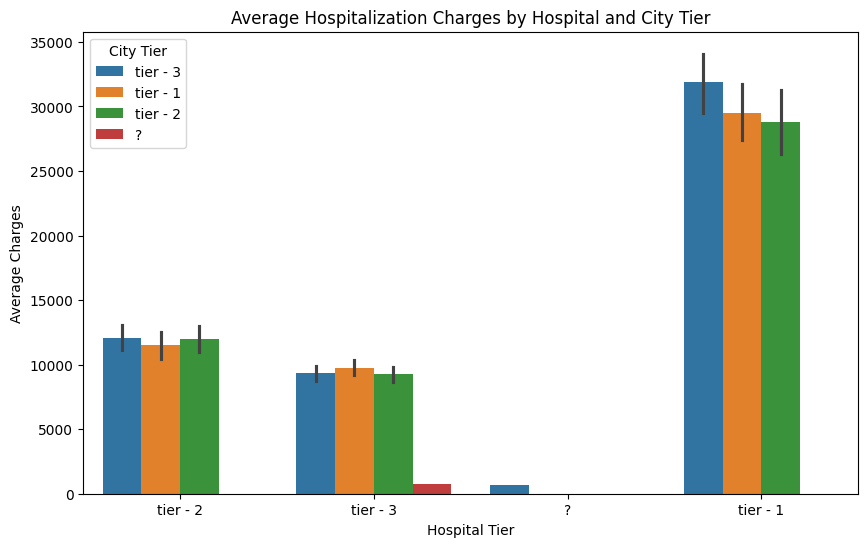

In [4]:

# Bar plot to show the distribution of hospitalization charges by hospital tier and city tier
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='Hospital tier', y='charges', hue='City tier')
plt.title('Average Hospitalization Charges by Hospital and City Tier')
plt.ylabel('Average Charges')
plt.xlabel('Hospital Tier')
plt.legend(title='City Tier')
plt.show()


### Correlation Heatmap

In [5]:

# Heatmap to show the correlation between numerical variables
plt.figure(figsize=(8, 6))
corr_matrix = merged_data[['BMI', 'HBA1C', 'charges', 'year']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of BMI, HBA1C, Charges, and Year of Hospitalization')
plt.show()


ValueError: could not convert string to float: '?'

<Figure size 800x600 with 0 Axes>

## Additional Visualizations and Analysis

### Box Plot: Distribution of Hospitalization Charges by Hospital Tier

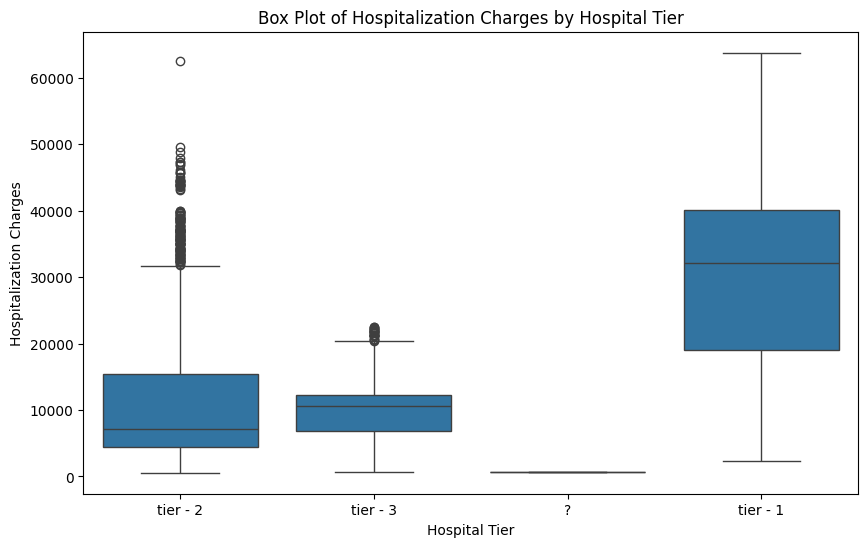

In [11]:

# Box Plot: Distribution of hospitalization charges across hospital tiers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_with_names, x='Hospital tier', y='charges')
plt.title('Box Plot of Hospitalization Charges by Hospital Tier')
plt.ylabel('Hospitalization Charges')
plt.xlabel('Hospital Tier')
plt.show()


### Violin Plot: Distribution of Hospitalization Charges by City Tier

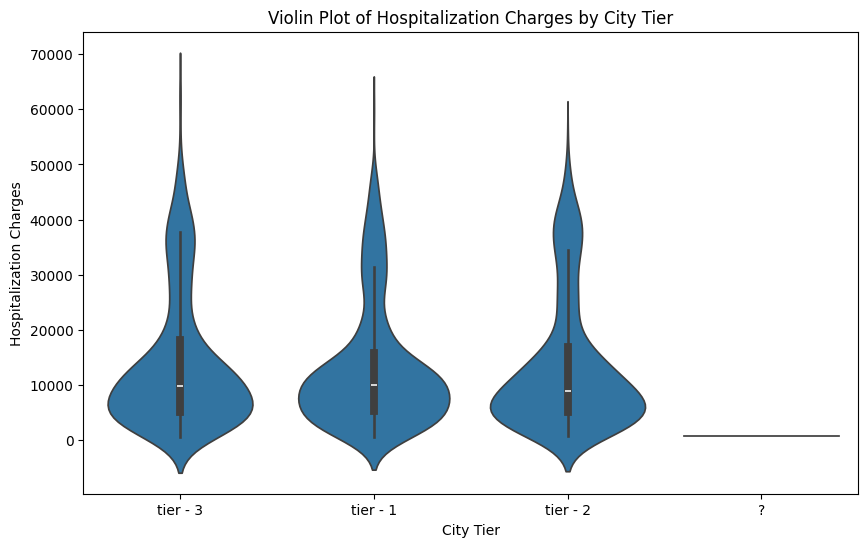

In [12]:

# Violin Plot: Distribution of hospitalization charges across city tiers
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data_with_names, x='City tier', y='charges')
plt.title('Violin Plot of Hospitalization Charges by City Tier')
plt.ylabel('Hospitalization Charges')
plt.xlabel('City Tier')
plt.show()


### Line Plot: Trends of Hospitalization Charges over the Years

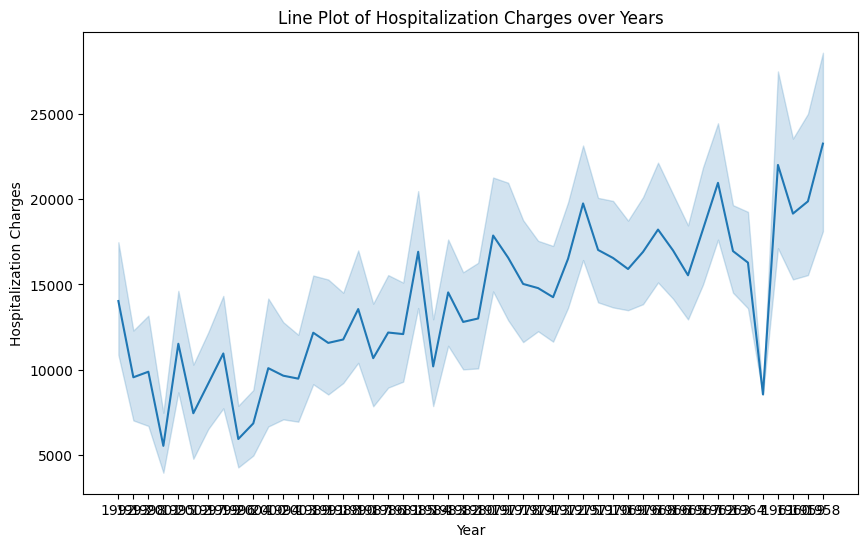

In [13]:

# Line Plot: Trends of hospitalization charges over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data_with_names, x='year', y='charges')
plt.title('Line Plot of Hospitalization Charges over Years')
plt.ylabel('Hospitalization Charges')
plt.xlabel('Year')
plt.show()


### Count Plot: Count of Customers with Cancer History

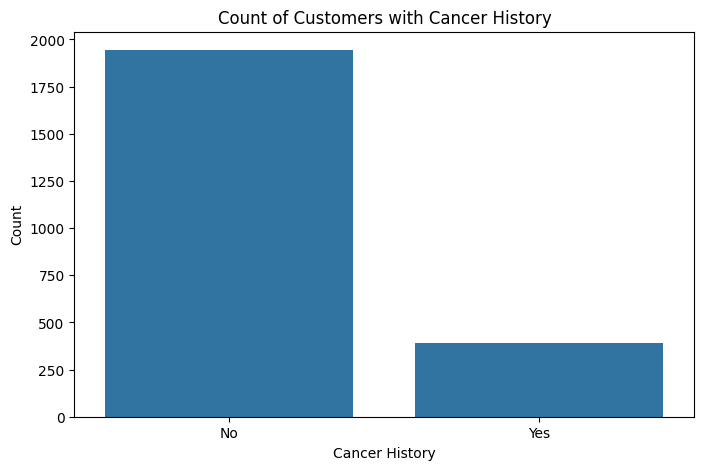

In [14]:

# Count Plot: Count of customers with cancer history
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_data_with_names, x='Cancer history')
plt.title('Count of Customers with Cancer History')
plt.xlabel('Cancer History')
plt.ylabel('Count')
plt.show()


### Joint Plot: Relationship between BMI and Hospitalization Charges

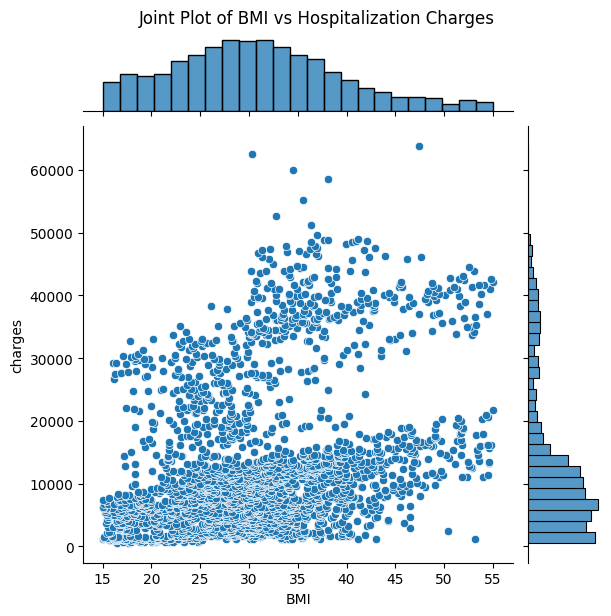

In [15]:

# Joint Plot: Relationship between BMI and hospitalization charges
sns.jointplot(data=merged_data_with_names, x='BMI', y='charges', kind="scatter")
plt.suptitle('Joint Plot of BMI vs Hospitalization Charges', y=1.02)
plt.show()


### Facet Grid: Distribution of Charges across Hospital Tiers and City Tiers

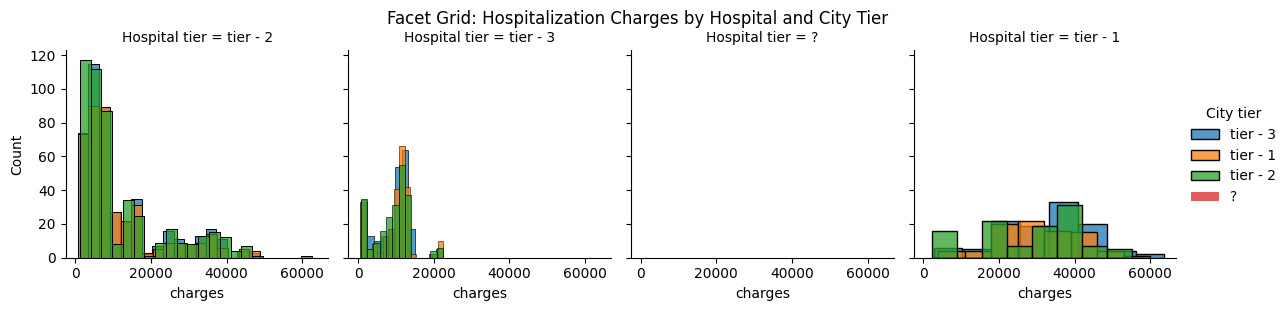

In [16]:

# Facet Grid: Distribution of charges across hospital tiers and city tiers
facet = sns.FacetGrid(merged_data_with_names, col='Hospital tier', hue='City tier')
facet.map(sns.histplot, 'charges', kde=False)
facet.add_legend()
facet.fig.suptitle('Facet Grid: Hospitalization Charges by Hospital and City Tier', y=1.02)
plt.show()


### Pie Chart: Proportion of Customers who are Smokers

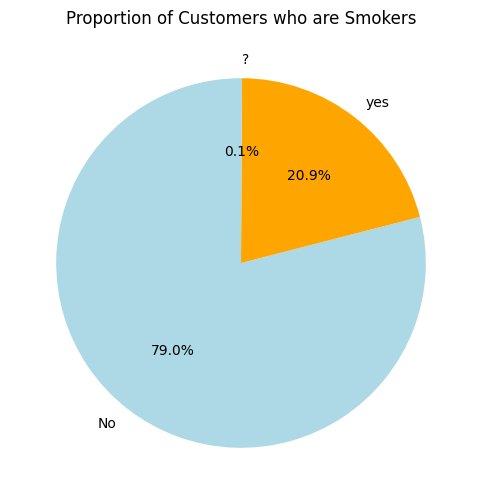

In [17]:

# Pie Chart: Proportion of customers who are smokers
smoker_counts = merged_data_with_names['smoker'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Proportion of Customers who are Smokers')
plt.show()


## Cleaned Correlation Heatmap

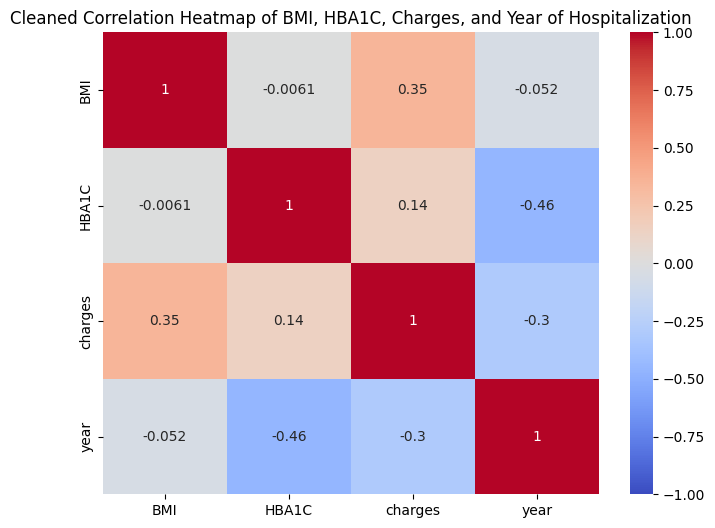

In [19]:

# Heatmap to show the correlation between numerical variables using cleaned data
import numpy as np

# Replace '?' with NaN in the merged dataset
merged_data_cleaned = merged_data_with_names.replace('?', np.nan)

# Convert necessary columns to numeric types (if needed) to ensure proper correlation calculation
merged_data_cleaned['BMI'] = pd.to_numeric(merged_data_cleaned['BMI'], errors='coerce')
merged_data_cleaned['HBA1C'] = pd.to_numeric(merged_data_cleaned['HBA1C'], errors='coerce')
merged_data_cleaned['charges'] = pd.to_numeric(merged_data_cleaned['charges'], errors='coerce')
merged_data_cleaned['year'] = pd.to_numeric(merged_data_cleaned['year'], errors='coerce')

plt.figure(figsize=(8, 6))
corr_matrix_cleaned = merged_data_cleaned[['BMI', 'HBA1C', 'charges', 'year']].astype(float).corr()
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cleaned Correlation Heatmap of BMI, HBA1C, Charges, and Year of Hospitalization')
plt.show()
